## Preliminary Analysis

In [61]:
import pandas as pd

# Import csv data
df = pd.read_csv("songs_normalize.csv")
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


(1820, 18)


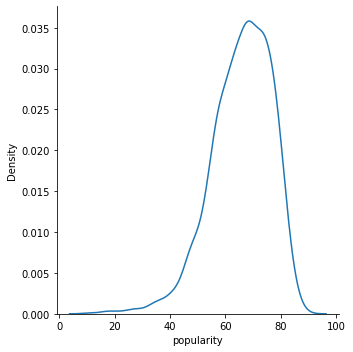

In [64]:
import seaborn as sns

# Trim out what seem to be mistakes in popularity recordings
df = df[df['popularity'] > 10]

print(df.shape)

# View popularity distribution
sns.displot(df['popularity'], kind='kde')

## Problem 1:
Using popularity as our ground truth value, can we design a model that predicts a songs popularity based off of its other features?

The initial approach will consist of a linear regression model to determine if this problem can be solved adequately by coming up with appropriate weights for each feature.

[[-2.43520106e-05  3.07639153e+00 -4.58326945e+00 -4.51953584e-02
   5.31881544e-01  1.83339161e-01  2.50587557e+00  3.07401191e+00
  -1.87393381e+00 -3.88624537e+00 -4.39576451e+00  1.17078059e-02]]
RMSE
11.169306387783244


<AxesSubplot:xlabel='popularity'>

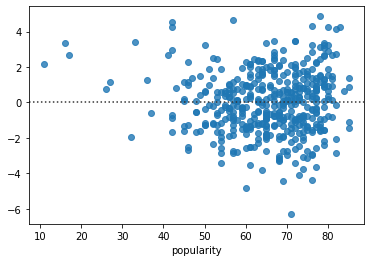

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Choose features (not using instrumentalness)
X = df[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Define truth
y = df[['popularity']]

# Split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

linreg = LinearRegression().fit(X_train, y_train)

print(linreg.coef_)

y_pred = linreg.predict(X_test)

e = mean_squared_error(y_test, y_pred, squared=False)

print("RMSE")
print(e)

# Plot residuals
sns.residplot(x=y_test, y=y_pred)